In [4]:
!kaggle datasets download -d kmader/mias-mammography

 98% 306M/312M [00:03<00:00, 89.3MB/s]
100% 312M/312M [00:03<00:00, 82.5MB/s]


In [5]:
!unzip 'mias-mammography'

Archive:  mias-mammography.zip
  inflating: Info.txt                
  inflating: all-mias.tar.gz         
  inflating: all-mias/Info.txt       
  inflating: all-mias/Licence.txt    
  inflating: all-mias/README         
  inflating: all-mias/mdb001.pgm     
  inflating: all-mias/mdb002.pgm     
  inflating: all-mias/mdb003.pgm     
  inflating: all-mias/mdb004.pgm     
  inflating: all-mias/mdb005.pgm     
  inflating: all-mias/mdb006.pgm     
  inflating: all-mias/mdb007.pgm     
  inflating: all-mias/mdb008.pgm     
  inflating: all-mias/mdb009.pgm     
  inflating: all-mias/mdb010.pgm     
  inflating: all-mias/mdb011.pgm     
  inflating: all-mias/mdb012.pgm     
  inflating: all-mias/mdb013.pgm     
  inflating: all-mias/mdb014.pgm     
  inflating: all-mias/mdb015.pgm     
  inflating: all-mias/mdb016.pgm     
  inflating: all-mias/mdb017.pgm     
  inflating: all-mias/mdb018.pgm     
  inflating: all-mias/mdb019.pgm     
  inflating: all-mias/mdb020.pgm     
  inflating: all-mi

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
print('Libraries Imported')

Libraries Imported


In [8]:
path = 'all-mias/'

an example of image path

../input/mias-mammography/all-mias/mdb001.pgm

## Read Data

In [9]:
import pandas as pd

print("reading dataframe")
info=pd.read_csv("Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


About the Dataset
Incudes 330 samples
Label:

- 1st column:
MIAS database reference number.

- 2nd column:
Character of background tissue:
F Fatty
,G Fatty-glandular
,D Dense-glandular

- 3rd column:
Class of abnormality present:
CALC Calcification
,CIRC Well-defined/circumscribed masses
,SPIC Spiculated masses
,MISC Other, ill-defined masses
,ARCH Architectural distortion
,ASYM Asymmetry
,NORM Normal

- 4th column:
Severity of abnormality;
B Benign
,M Malignant
- 5th, 6th columns:
x,y image-coordinates of centre of abnormality.
- 7th column:
Approximate radius (in pixels) of a circle enclosing the abnormality.

In [10]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [11]:
info['SEVERITY'] = info['SEVERITY'].fillna('Normal')

In [12]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,Normal,NaN,NaN,NaN
3,mdb004,D,NORM,Normal,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,Normal,NaN,NaN,NaN
326,mdb319,D,NORM,Normal,NaN,NaN,NaN
327,mdb320,D,NORM,Normal,NaN,NaN,NaN
328,mdb321,D,NORM,Normal,NaN,NaN,NaN


In [13]:
label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    if info.SEVERITY[i] == 'M':
        label.append(0)
    if info.SEVERITY[i] == 'Normal':
        label.append(2)

print(len(label))

330


In [14]:
# taking the images filenames in to dictionary
ids = {}
for i in range(len(info)):
    ids[i] = info.REFNUM[i]
#ids

In [16]:
label = np.array(label)

In [17]:
label.shape

(330,)

In [18]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [19]:
img_name = np.array(img_name)

In [20]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (330,)


The structure of the malignant and benign:

- Benign masses have a circular or oval shape, while malignant masses are irregular in shape and contain small, needle-like masses.

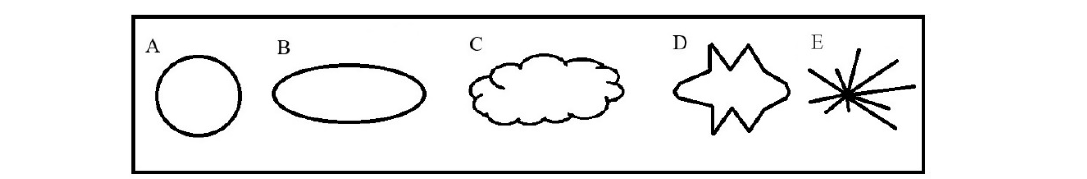

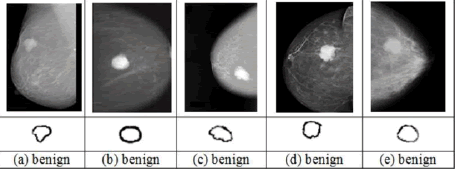

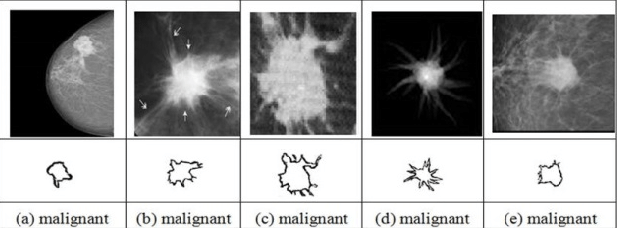

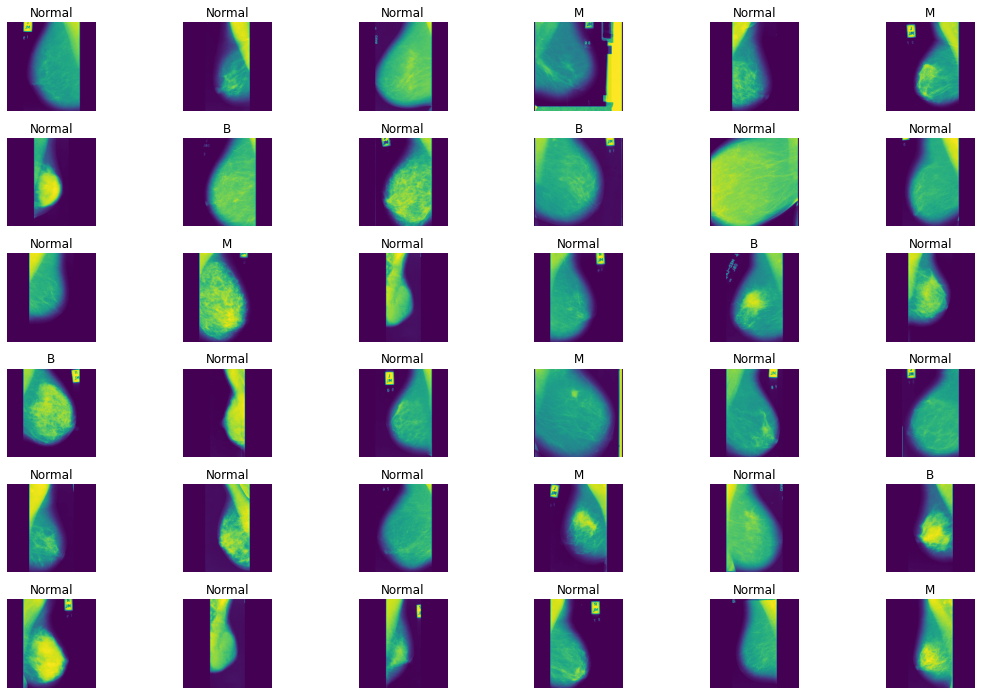

In [21]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(36):
        rand = random.randint(0,len(label))
        ax = plt.subplot(6, 6, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('B')
        if label[rand] == 0:
            plt.title('M')
        if label[rand] == 2:
            plt.title('Normal')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

=========================================================================================

Preprocessing
 
- Due to the type of mammography imaging, these images fall into the category of noisy images. Therefore, before performing image processing operations on these images, the noise in the image must be eliminated. The middle filter is widely used in image processing.


====================================================================================

Can a breast cyst turn into cancer?
- For many women, their biggest concern about a cyst is that it is, or will become, cancer. Cysts are not cancers. They are no more likely to become cancerous than any other part of the breast. There is no evidence that cysts cause cancer.

In [ ]:
label = []
for i in range(len(info)):
    if info.CLASS[i] == 'CALC':
        label.append(0)

print(len(label))

30


In [ ]:
label = np.array(label)

In [ ]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

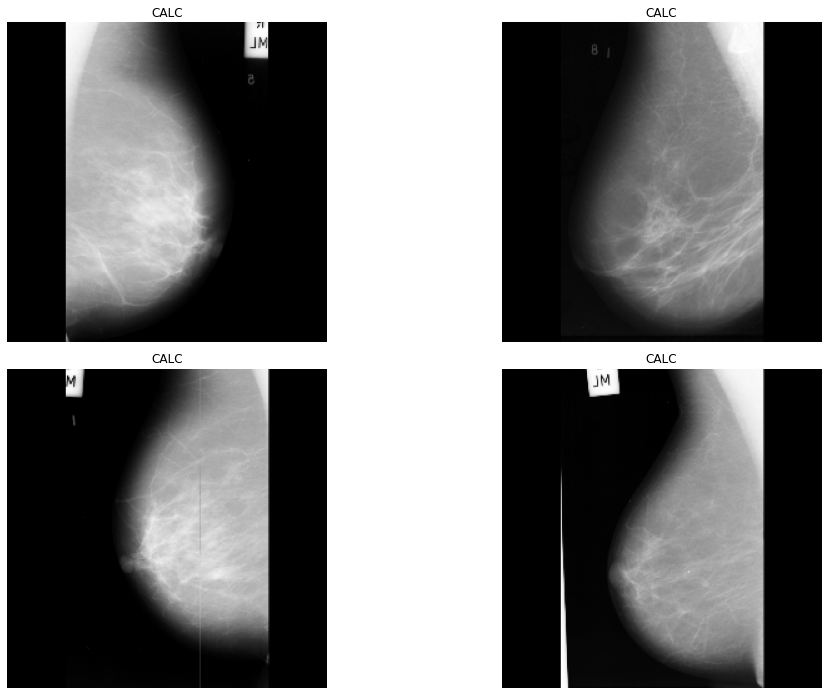

In [ ]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(4):
        rand = random.randint(0,len(label))
        ax = plt.subplot(2, 2, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 0:
            plt.title('CALC')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

====================================================================

Can breast calcifications turn into cancer?
- Calcifications aren't connected to the calcium in your diet. They also can't develop into breast cancer. Rather, they are a “marker” for some underlying process that is occurring in the breast tissue. In most cases, the process is benign (not associated with cancer).

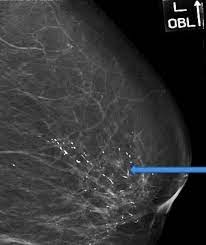

===================================================================

What does it mean asymmetry breast on mammogram?
- Breast asymmetry refers to the appearance of a part of the breast in comparison to the remainder of that breast and to the other breast. A radiologist will examine a mammogram to look at the difference in position, volume, and form of the breasts.

In [ ]:
label = []
for i in range(len(info)):
    if info.CLASS[i] == 'ASYM':
        label.append(0)

print(len(label))

15


In [ ]:
label = np.array(label)

In [ ]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

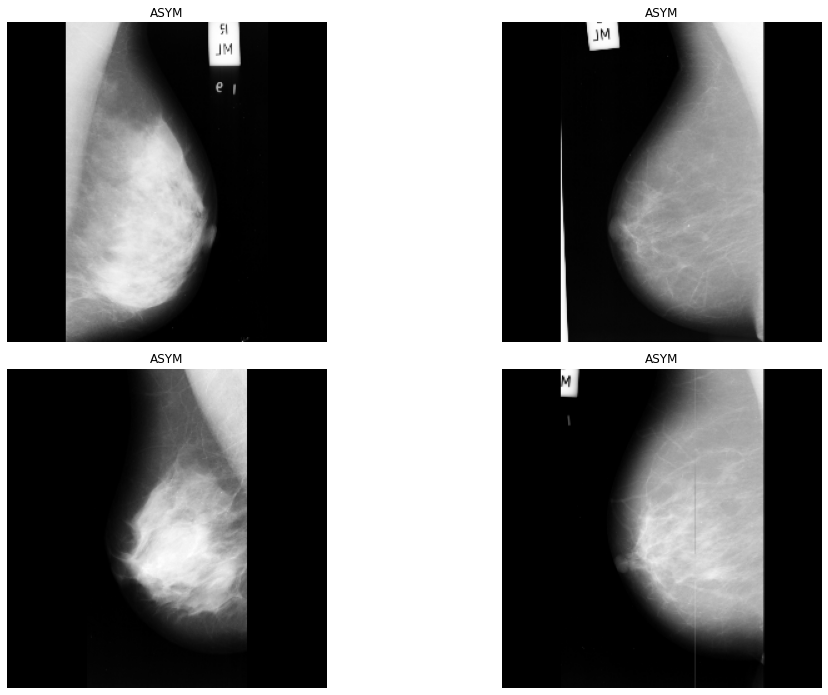

In [ ]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(4):
        rand = random.randint(0,len(label))
        ax = plt.subplot(2, 2, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 0:
            plt.title('ASYM')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

===================================================================

What is architectural distortion?
- Architectural distortion, which refers to distortion of the breast parenchyma with no definite mass visible, can have a malignant or benign cause. A new study compares the risk of malignancy associated with architectural distortion detected on 2D digital mammography (DM) versus digital breast tomosynthesis (DBT).

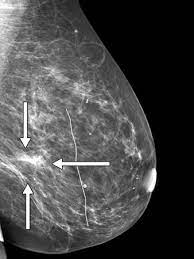

In [ ]:
label = []
for i in range(len(info)):
    if info.CLASS[i] == 'ARCH':
        label.append(0)

print(len(label))

19


In [ ]:
label = np.array(label)

In [ ]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

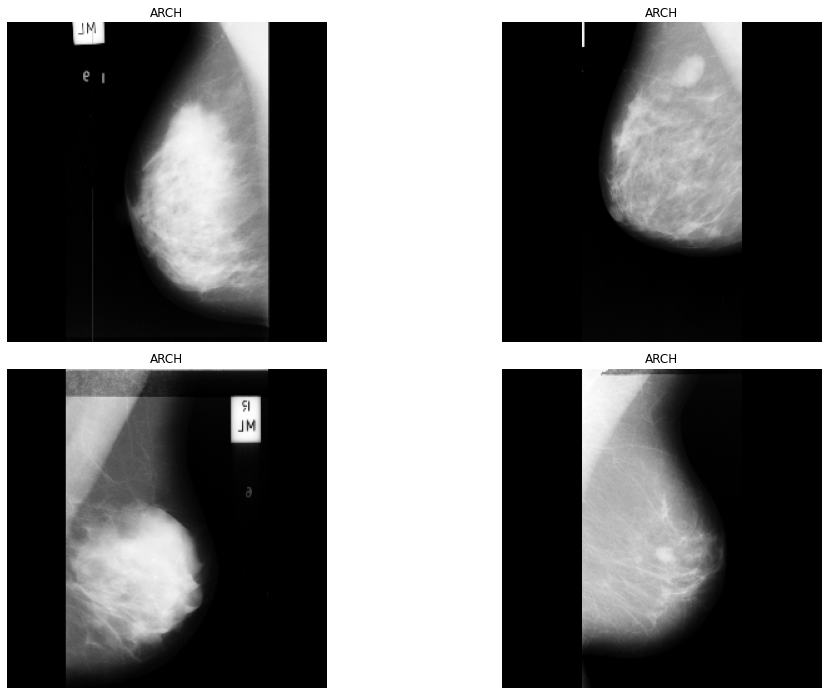

In [ ]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(4):
        rand = random.randint(0,len(label))
        ax = plt.subplot(2, 2, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 0:
            plt.title('ARCH')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

## Comapare the masses of the Breast

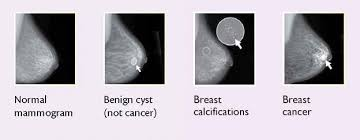